In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

from cosinorage.dataloaders import DataLoader
from cosinorage.features import WearableFeatures

%load_ext autoreload
%autoreload 2

## Raw Accelerometer Data obtained from Smartwatch

In [2]:
reload_smartwatch_p = True

In [3]:
preprocess_args = {
    'autocalib_tol': 10e-20,
    'autocalib_max_iter': 1000,
    'autocalib_epoch_size': 10,
    'filter_type': 'highpass',
    'filter_cutoff': 5
}

In [4]:
if reload_smartwatch_p:
    smartwatch_loader_p = DataLoader(datasource='smartwatch', input_path='../data/62164/', preprocess=True, preprocess_args=preprocess_args)
    smartwatch_loader_p.load_data(verbose=True)
    with open("smartwatch_loader_p.pkl", "wb") as file:
        pickle.dump(smartwatch_loader_p, file)
else:
    with open("smartwatch_loader_p.pkl", "rb") as file:
        smartwatch_loader_p = pickle.load(file)

Loading CSV files: 100%|██████████| 145/145 [00:13<00:00, 10.88it/s]


Loaded 41760000 accelerometer data records from ../data/62164/
The frequency of the accelerometer data is 80.0Hz
Filtered out 7200000 accelerometer records due to incomplete daily coverage


Calibrating:  37%|███▋      | 368/1000 [06:01<10:20,  1.02iter/s]


Convergence reached at iteration 369
Calibration successful.
Calibration done
Noise removal done
Wear detection done
Wear time calculated
Preprocessed accelerometer data
Calculated ENMO for 34560000 accelerometer records
Aggregated ENMO values at the minute level leading to 7200 records
load_data executed in 436.06 seconds


100%|██████████| 479/479 [00:00<00:00, 25186.75it/s]


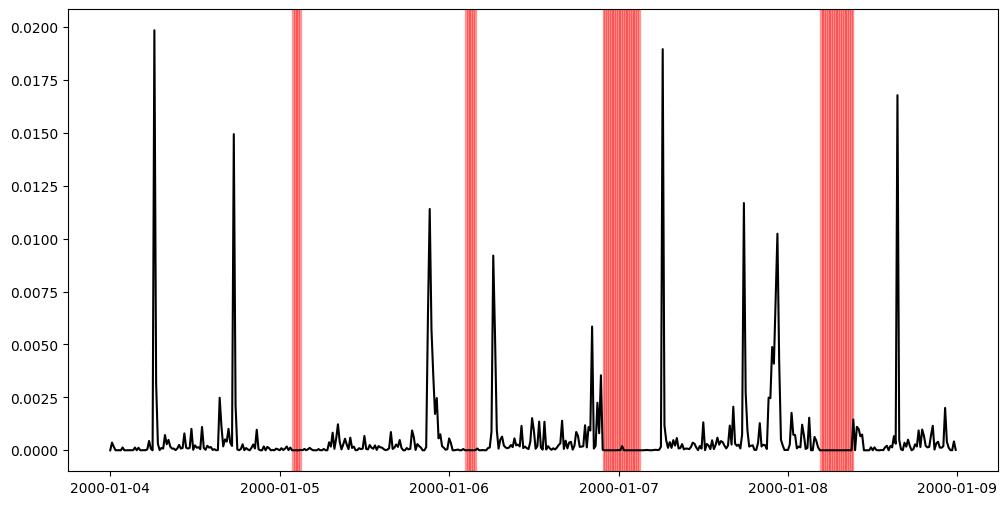

In [5]:
smartwatch_loader_p.plot_orig_enmo()

100%|██████████| 7199/7199 [00:00<00:00, 25832.29it/s]


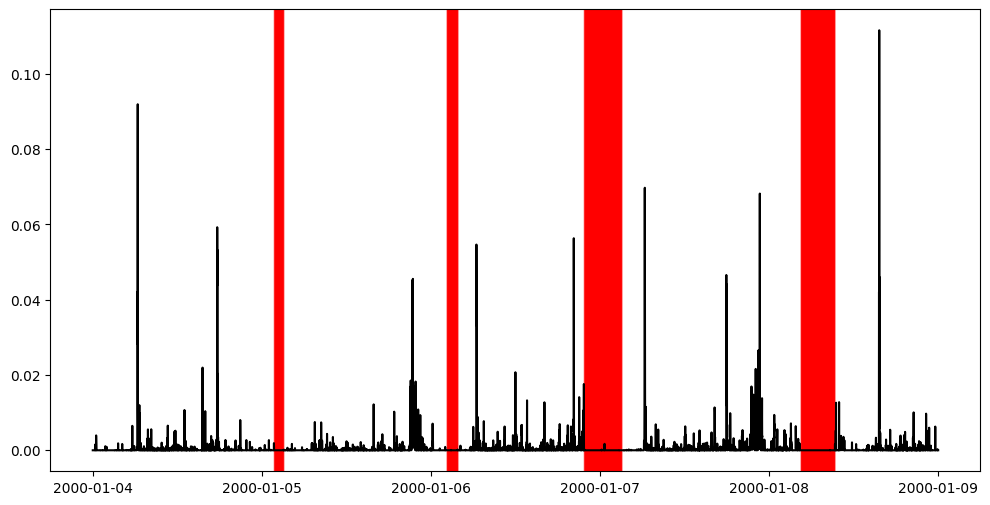

In [6]:
smartwatch_loader_p.plot_enmo()

In [7]:
smartwatch_loader_p.get_meta_data()

{'initial calibration error': 0.019900845583211396,
 'final calibration error': 0.004269330950445895,
 'offset': array([ 0.0280229 , -0.04103817, -0.01399065]),
 'scale': array([0.99644409, 0.99894598, 0.99920414]),
 'total time': 431999.9875,
 'wear time': 391938.75,
 'non-wear time': 40061.23749999999}

In [8]:
reload_smartwatch = True

In [9]:
if reload_smartwatch:
    smartwatch_loader = DataLoader(datasource='smartwatch', input_path='../data/62164/', preprocess=False)
    smartwatch_loader.load_data(verbose=True)
    with open("smartwatch_loader.pkl", "wb") as file:
        pickle.dump(smartwatch_loader, file)
else:
    with open("smartwatch_loader.pkl", "rb") as file:
        smartwatch_loader = pickle.load(file)

Loading CSV files: 100%|██████████| 145/145 [00:13<00:00, 10.43it/s]


Loaded 41760000 accelerometer data records from ../data/62164/
The frequency of the accelerometer data is 80.0Hz
Filtered out 7200000 accelerometer records due to incomplete daily coverage
Calculated ENMO for 34560000 accelerometer records
Aggregated ENMO values at the minute level leading to 7200 records
load_data executed in 37.22 seconds


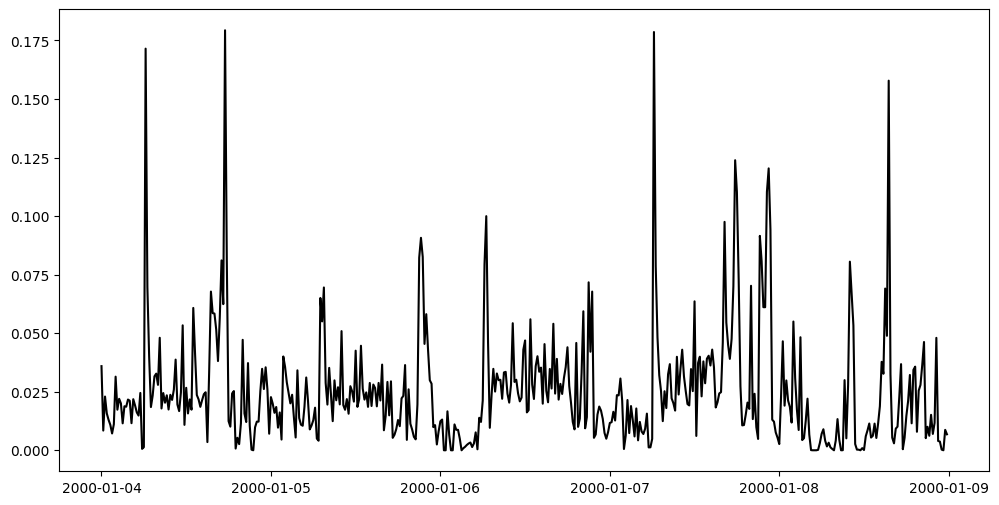

In [10]:
smartwatch_loader.plot_orig_enmo(wear=False)

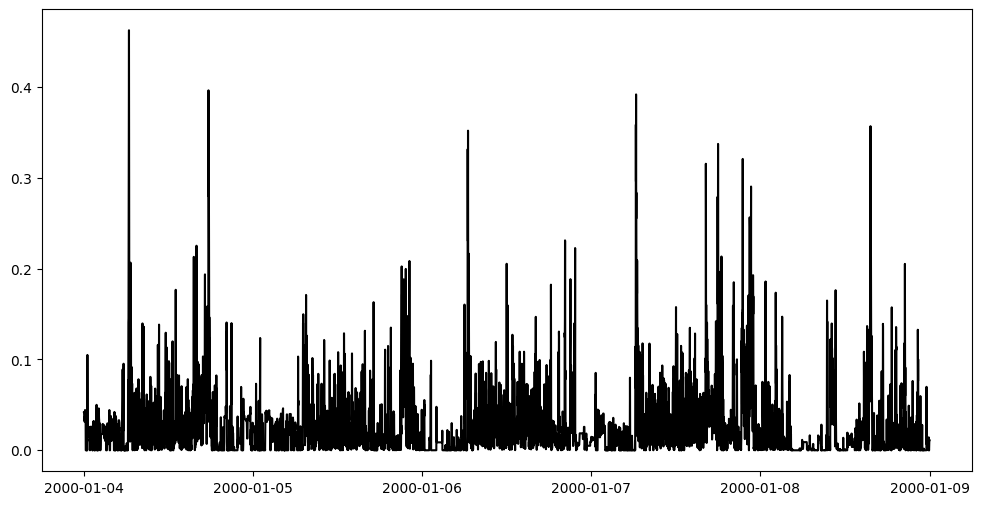

In [11]:
smartwatch_loader.plot_enmo()


In [12]:
smartwatch_loader.get_meta_data()

{}

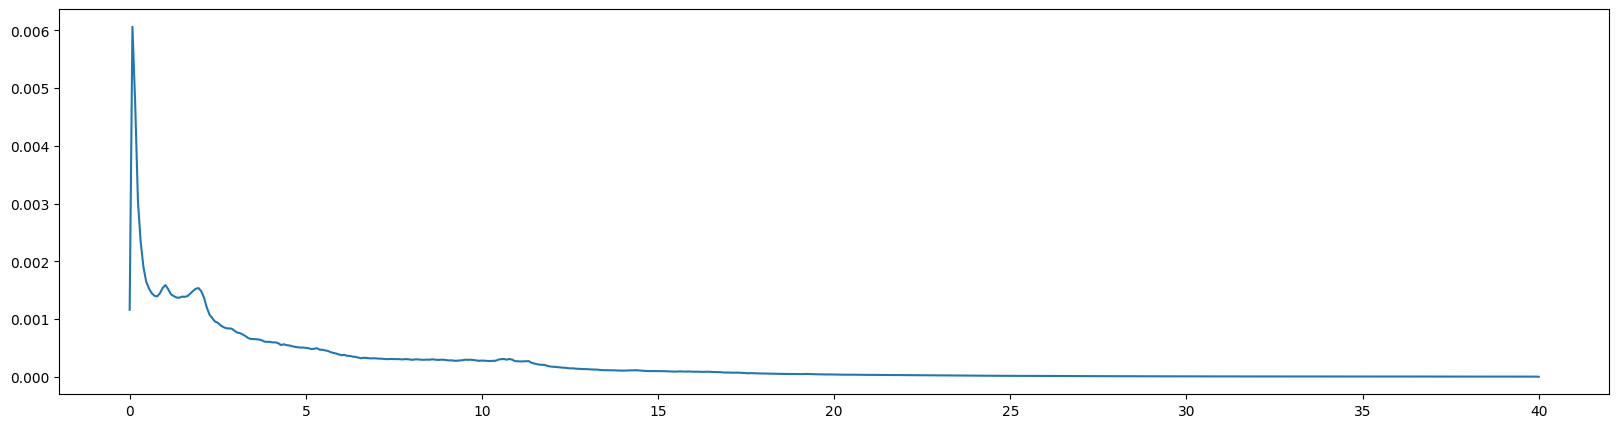

In [13]:
smartwatch_loader.plot_orig_enmo_freq()

## Compute features

In [14]:
features_p = WearableFeatures(smartwatch_loader_p)
features_p.get_IV()
features_p.get_IS()
features_p.get_RA()
features_p.get_M10()
features_p.get_L5()
features_p.get_M10_start()
features_p.get_L5_start()
features_p.get_SB()
features_p.get_LIPA()
features_p.get_MVPA()
features_p.get_WASO()
features_p.get_TST()
features_p.get_PTA()
features_p.get_SRI()
_, cosinor_ts = features_p.get_cosinor_features()


In [15]:
features_p.get_all()

,IV,IS,RA,M10,M10_start,L5,L5_start,SB,LIPA,MVPA,WASO,TST,PTA,SRI
2000-01-04,0.525797,0.160387,0.960535,0.001347,6,0.000027,2,17.933333,5.766667,0.300000,227.0,462.0,0.641667,NaN
2000-01-05,1.321597,0.583506,0.963258,0.001064,21,0.000020,2,17.116667,6.616667,0.266667,413.0,996.0,0.691667,12.083333
2000-01-06,0.915420,0.374524,0.988260,0.001110,6,0.000007,22,15.633333,8.166667,0.200000,578.0,849.0,0.589583,17.777778
2000-01-07,0.735842,0.163111,0.994662,0.002078,22,0.000006,1,14.700000,8.850000,0.450000,533.0,853.0,0.592361,33.194444
2000-01-08,1.524658,0.273549,0.985016,0.000966,15,0.000007,5,17.650000,6.216667,0.133333,NaN,NaN,NaN,4.305556


In [16]:
features_p.get_enmo_data()

,ENMO,wear,sleep_predictions
TIMESTAMP,,,
2000-01-04 00:00:00,0.0,1.0,1
2000-01-04 00:01:00,0.0,1.0,1
2000-01-04 00:02:00,0.0,1.0,1
2000-01-04 00:03:00,0.0,1.0,1
2000-01-04 00:04:00,0.0,1.0,1
...,...,...,...
2000-01-08 23:55:00,0.0,1.0,1
2000-01-08 23:56:00,0.0,1.0,1
2000-01-08 23:57:00,0.0,1.0,1


/Users/jacobleooskar/Documents/Education/ETHZ/Curriculum/Semester03/03SemProj/CosinorAge/cosinorage/features/features.py:140: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(1, 1)


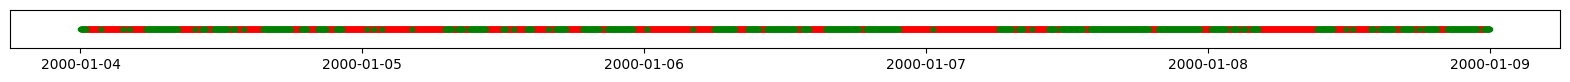

In [17]:
features_p.plot_sleep_predictions()

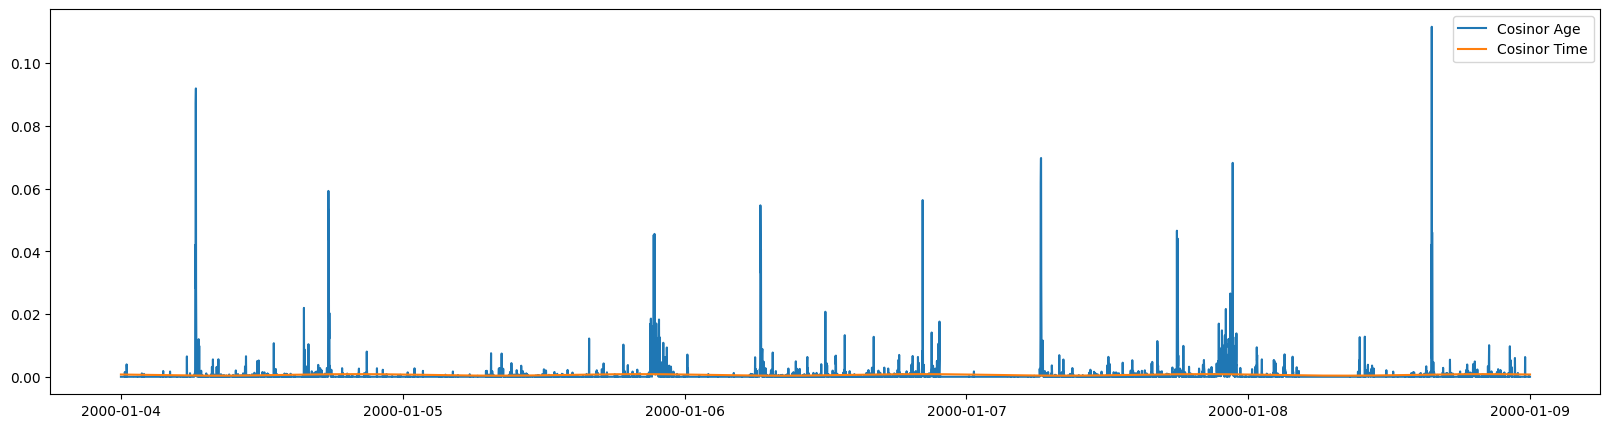

In [18]:
plt.figure(figsize=(20, 5))
plt.plot(cosinor_ts)
plt.legend(["Cosinor Age", "Cosinor Time"])
plt.show()

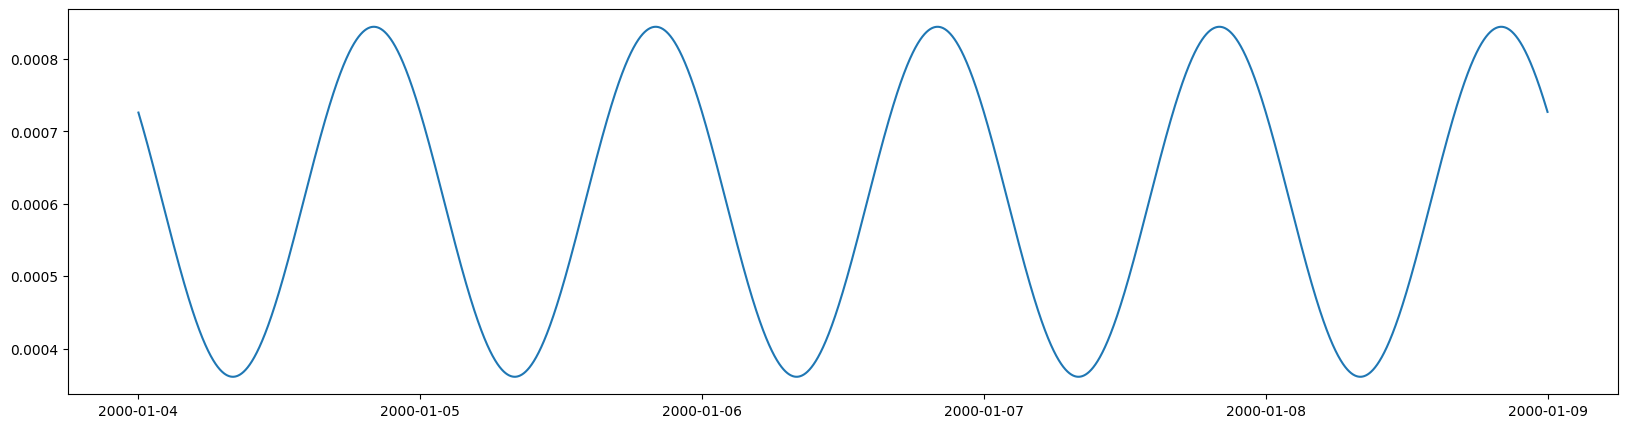

In [19]:
plt.figure(figsize=(20, 5))
plt.plot(cosinor_ts['fitted'])
plt.show()
